<a href="https://colab.research.google.com/github/Evangenajohn/Early-Detection-of-Autism-in-Toddlers/blob/main/repetitive_gesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies if needed
!pip install mediapipe tensorflow numpy opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is inco

In [ ]:
!pip install --upgrade --force-reinstall numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
yfinance 0.2.59 requires protobuf<6,>=5.29.0, but you have protobuf 4.25.7 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!pip install --upgrade --force-reinstall mediapipe

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 7.9 MB/s eta 0:00:00
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.3 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached sounddevice-0.5.1-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [ ]:
mp_pose = mp.solutions.pose

In [ ]:
# STEP 1: Mount Google Drive and Load Video
import os
from google.colab import drive
drive.mount('/content/drive')
video_path = '/content/drive/MyDrive/videos_task/repetitive1.mp4'

Mounted at /content/drive


In [ ]:
# Step 1: Extract pose keypoints sequences from videos
def extract_pose_keypoints(video_path, max_frames=100):
    cap = cv2.VideoCapture(video_path)
    pose = mp_pose.Pose(static_image_mode=False)
    keypoints_seq = []

    while cap.isOpened() and len(keypoints_seq) < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            # Extract x,y,z of selected keypoints (e.g. wrists and elbows)
            keypoints = []
            for idx in [15, 16, 13, 14]:  # Right Wrist, Left Wrist, Right Elbow, Left Elbow
                lm = landmarks[idx]
                keypoints.extend([lm.x, lm.y, lm.z])
            keypoints_seq.append(keypoints)
        else:
            # If no detection, append zeros
            keypoints_seq.append([0]*12)

    cap.release()
    pose.close()
    return np.array(keypoints_seq)

In [ ]:
# Step 2: Create dataset (For demo, we will create dummy data)
def create_dummy_dataset(num_samples=50, seq_length=100):
    X = []
    y = []
    for i in range(num_samples):
        # Random walk signals to simulate keypoints with some repetitive pattern
        seq = np.sin(np.linspace(0, 10*np.pi, seq_length)) + np.random.normal(0, 0.1, seq_length)
        seq = np.tile(seq, (12,1)).T  # shape (seq_length, 12)
        label = 1 if i < num_samples//2 else 0  # first half repetitive, second half non-repetitive
        if label == 0:
            seq = np.random.normal(0, 1, (seq_length, 12))  # random noise for non-repetitive
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
# Step 3: Build CNN + LSTM model
def build_cnn_lstm_model(seq_length=100, num_features=12):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(seq_length, num_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Main demo: train model on dummy data
seq_length = 100
num_features = 12
X, y = create_dummy_dataset(num_samples=100, seq_length=seq_length)

model = build_cnn_lstm_model(seq_length=seq_length, num_features=num_features)

history = model.fit(X, y, epochs=15, batch_size=8, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.8671 - loss: 0.5210 - val_accuracy: 1.0000 - val_loss: 0.2986
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 1.0000 - loss: 0.1802 - val_accuracy: 1.0000 - val_loss: 0.0554
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 1.0000 - loss: 0.0508 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 -

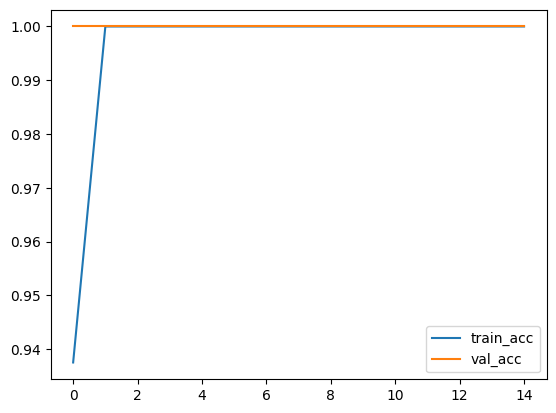

In [ ]:
# Plot training
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
test_seq = extract_pose_keypoints(video_path)
test_seq = np.expand_dims(test_seq, axis=0)  # Add batch dimension
pred = model.predict(test_seq)
print("Repetitive Movement Probability:", pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Repetitive Movement Probability: 0.99766874


In [ ]:
model.save('repetitive_movement_cnn_lstm.h5')

In [ ]:
from google.colab import files
files.download('repetitive_movement_cnn_lstm.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>